<img src="https://raw.githubusercontent.com/UCLAMAEThreads/FluidDynTools.jl/main/notebook/logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **Introduction to Fluid Dynamics**
<hr />

# Velocity profiles
In this notebook, we will discuss a useful way to visualize a flow in fluid
mechanics: the **velocity profile**.

### Set up the module

In [1]:
using FluidDynTools

In [2]:
using Plots

To start, let's consider one of the most basic types of flow: the linear shear flow,
often called **Couette flow**. This type of flow is generated, for example, between
two parallel walls when one wall is moving and the other is stationary. In the figure
below, the top wall is moving with velocity $U$, the lower wall is stationary:

<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE103/master/notebook/Couette.svg" alt="velocity profile" width="300" align="center"/>

Because of the **no-slip condition**, the fluid next to each wall moves with it. The
fluid next to the upper wall moves at velocity $U$, the fluid next to the lower wall
is at rest.

The velocity profile depicts $u(y)$, the horizontal component of velocity as a
function of vertical position, $y$. This increases linearly from the lower to the
upper wall. In fact, the function is just

$$u(y) = Uy/H$$

The arrows indicate the direction that the fluid is moving, and the lengths of
the arrows indicate the relative speed at that $y$ position.

### Shear stress
We can calculate the viscous shear stress at any location with the equation

$$\tau = \mu \frac{\mathrm{d}u}{\mathrm{d}y}$$

In fact, in Couette flow, shear stress is the same everywhere:

$$\tau = \mu U/H$$

This represents, e.g., the resistive force (per unit area) that the fluid applies
(to the left) on the upper wall while the wall moves to the right.

It also represents the force per unit area that the lower wall must withstand in
order to remain stationary. The fluid is trying to drag the lower wall to the right,
so this must be balanced by some reaction force in the wall to the left.

The **rate of work** (per unit area) required to move the upper wall is $\dot{W} = \tau U$.
This would be measured in units of, e.g., $W/m^2$.

### Plotting velocity profiles
The arrows are helpful, but you can also plot a velocity profile without them.
For example, consider the following velocity:

$$u(y) = \frac{4U_c}{H^2} y (H - y)$$

The coefficient $U_c$ is a speed, and $H$ is the gap height.
Let's define a function that evaluates this velocity. Here, `y`, `Uc`, and `H`
are to be given as arguments to the function.

In [3]:
u(y,Uc,H) = 4*Uc/H^2*y*(H-y)

u (generic function with 1 method)

Suppose the gap height $H$ is 1 cm and the speed $U_c$ is 1 m/s. We will evaluate
this velocity at a range of locations between 0 and $H$. Here, we evaluate
the velocity at 101 points. There's nothing magical about this number; it just
is enough to make the curve look smooth. Also, note that we have to give
units for the `y` values, as well:

In [4]:
H = 1u"cm"
Uc = 1u"m/s"
y = range(0u"cm",H,length=101)

(0.0:0.01:1.0) cm

Now we evaluate the velocity function at the range of $y$ locations. (Remember that
the `.` vectorizes the evaluation of a function. Here, we are telling it to
evaluate the function `u` at each element of the `y` array.) The resulting
velocities are assigned to `v`.

In [5]:
v = u.(y,Uc,H)

101-element Vector{Unitful.Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(m, s⁻¹), 𝐋 𝐓⁻¹, nothing}}}:
                 0.0 m s⁻¹
              0.0396 m s⁻¹
              0.0784 m s⁻¹
 0.11639999999999999 m s⁻¹
              0.1536 m s⁻¹
                0.19 m s⁻¹
 0.22559999999999997 m s⁻¹
              0.2604 m s⁻¹
              0.2944 m s⁻¹
              0.3276 m s⁻¹
                         ⋮
  0.2943999999999999 m s⁻¹
 0.26039999999999985 m s⁻¹
  0.2256000000000002 m s⁻¹
 0.19000000000000017 m s⁻¹
 0.15360000000000013 m s⁻¹
  0.1164000000000001 m s⁻¹
 0.07840000000000007 m s⁻¹
 0.03960000000000004 m s⁻¹
                 0.0 m s⁻¹

Notice that $u$ is 0 at the beginning and end of the range. Let's plot it. But
let's plot it as a velocity profile, which means we make velocity the 'x' axis and $y$
the 'y' axis:

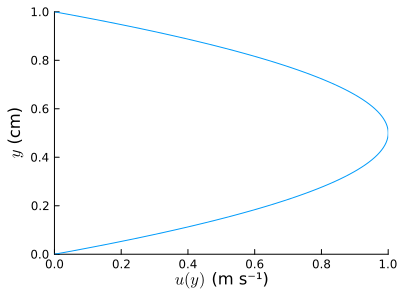

In [6]:
plot(v,y,xlim=(0,Inf),ylim=(0,Inf),xlabel=L"u(y)",ylabel=L"y")

NOTE: The use of `xlim=(0,Inf),ylim=(0,Inf)` simply ensures that the axes start at 0
and end at the upper range of the data in `v` and `y`, respectively.

The top and bottom of this plot suggest that these are stationary walls where the
flow is at rest. In fact, this is the velocity profile associated with pressure-driven
flow through the gap.

Suppose we wish to plot the velocity in different units. We can easily do this with
the `xunit` flag. For example, in `ft/s`:

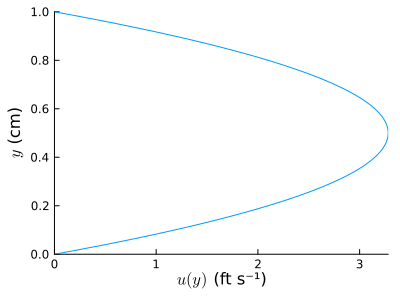

In [7]:
plot(v,y,xunit=u"ft/s",xlim=(0,Inf),ylim=(0,Inf),xlabel=L"u(y)",ylabel=L"y")

In the previous notebook, we showed that we can set velocity using
the `Velocity` function. We can do that here if we like. We'll call it `vv`.
We have to use the `.` notation to make sure each element in `v` gets the
same treatment:

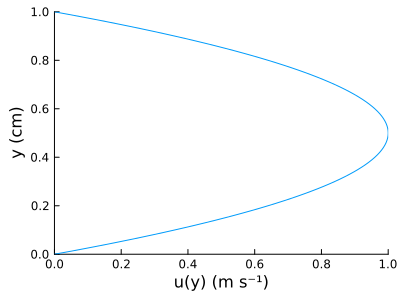

In [8]:
vv = Velocity.(v)
plot(vv,y,xlim=(0,Inf),ylim=(0,Inf),xlabel="u(y)",ylabel="y")

The `Velocity` function simply *wraps* the velocity data in `v`. It is
probably not immediately clear why we would need to do this, since the
data are already in the correct units (m/s). However, it
will be useful later when we use functions that perform calculations,
and we wish to make sure we don't try to provide the wrong type of data
to those functions.

#### Viscometry
We can use the relationship between the velocity and shear stress for many practical
tasks. In particular, it can be used to measure the viscosity of a given fluid,
in a device called a **viscometer**. This device consists of a rotating inner
cylinder of radius $R$ with prescribed angular velocity $\Omega$ and a stationary
outer wall, and a fluid with unknown viscosity, $\mu$, in the gap of size $H$ between
them.


<img src="https://raw.githubusercontent.com/UCLAMAEThreads/MAE103/master/notebook/Viscometer.svg" alt="viscometer" width="300" align="center"/>

The basic idea of a viscometer is that one knows the angular velocity $\Omega$
and measures the *torque*, $T$, required to rotate it. This torque is directly
attributable to the viscous shear stress acting on the inner cylinder.

Even though this is an annular region and not a straight gap like in the basic
Couette flow, the curvature does not matter here because the gap $H$ is very small
compared to the radius $R$.

Comparing this gap flow with the Couette flow above, the wall velocity here is
$U = \Omega R$, so the wall shear stress applied on the inner cylinder is

$$\tau = \mu \Omega R/H$$

How do we relate this to the measured torque? Torque is the force applied on the
wall times the distance to the center, $R$. The shear stress is uniformly applied
on the inner cylinder, so the force applied by the fluid is the shear stress times
the surface area,

$$T = \tau (2\pi R L) R$$

The term in parentheses is the surface area of the inner cylinder, where $L$ is its
length (into the page).

Thus, putting all of this together:

$$T = 2\pi L\mu \Omega R^3/H$$

#### A viscometer example
Let's suppose that we take measurements of a viscometer with the following
characteristics: inner radius $R = 6$ cm, gap height $H = 0.125$ cm, and length
$L = 13$ cm. We will convert everything to SI (i.e., meters):

In [9]:
R = 6u"cm"
H = 0.125u"cm"
L = 13u"cm";

We run the viscometer at 6 different speeds and measure the required torque in
each case. Here is the data we measured. Angular velocity is given in rad/s,
and torque in N$\cdot$m

In [10]:
Ω = [1.0,2.0,3.0,4.0,5.0,6.0]u"rad/s"

T = [0.181,0.36,0.54,0.72,0.899,1.086]u"N*m";

Let's plot the data to see the trend qualitatively:

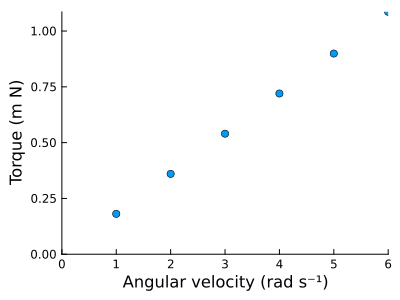

In [11]:
scatter(Ω,T,xlim=(0,Inf),ylim=(0,Inf),xlabel="Angular velocity",ylabel="Torque")

It looks quite linear! This is expected, since torque is linearly dependent on
the angular velocity in the relationship above.
Based on the equation above, we expect that the ratio of these two quantities
will be equal to $2\pi L\mu R^3/H$. So if we multiply the ratio by $H/(2\pi L R^3)$,
we expect

$$\dfrac{T H}{2\pi L R^3 \Omega} = \mu$$

Let's do this for our data. Since we are doing this for each data point,
we will get an array of values. (Notice the `.` in front of `/` when we divide by `Ω`.
Dividing by an array needs to be done in a vectorized manner.) We assign this
array the name `a`:

In [12]:
a = T./Ω*H/(2π*L*R^3)

6-element Vector{Unitful.Quantity{Float64, 𝐌 𝐋⁻¹ 𝐓⁻¹, Unitful.FreeUnits{(cm⁻³, m, N, rad⁻¹, s), 𝐌 𝐋⁻¹ 𝐓⁻¹, nothing}}}:
 1.2823648815719844e-6 m N s cm⁻³ rad⁻¹
 1.2752799927235202e-6 m N s cm⁻³ rad⁻¹
 1.2752799927235204e-6 m N s cm⁻³ rad⁻¹
 1.2752799927235202e-6 m N s cm⁻³ rad⁻¹
 1.2738630149538276e-6 m N s cm⁻³ rad⁻¹
 1.2823648815719846e-6 m N s cm⁻³ rad⁻¹

We expect `a` to give us viscosity, but there's always the chance for
experimental error. So we will take the mean of `a`. And we will use the
`Viscosity` function to put this in the default units of viscosity:

In [13]:
Viscosity(mean(a))

Viscosity = 1.2774054593780597 kg m⁻¹ s⁻¹

It's quite viscous! Only slightly smaller viscosity than glycerin.

In [14]:
Viscosity(Glycerin)

Viscosity = 1.5 kg m⁻¹ s⁻¹

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*